In [1]:
import numpy as np
%%capture
%pip install yfinance==0.2.14
%pip install darwinexDownloader==0.0.3

UsageError: Line magic function `%%capture` not found.


In [2]:
import yfinance as yf
import warnings
import matplotlib.pyplot as plt
import numpy as np

warnings.filterwarnings("ignore")
import datetime as dt
import pandas as pd

In [3]:
data_1 = yf.download("EURUSD=X")

[*********************100%***********************]  1 of 1 completed


In [4]:
data_1 = data_1.loc[data_1.index>='2022-01-01']

In [5]:
print(data_1)

                Open      High       Low     Close  Adj Close  Volume
Date                                                                 
2022-01-03  1.137385  1.137592  1.128541  1.137346   1.137346       0
2022-01-04  1.130199  1.132300  1.127345  1.130224   1.130224       0
2022-01-05  1.128541  1.134559  1.127764  1.128363   1.128363       0
2022-01-06  1.131222  1.133067  1.128554  1.131350   1.131350       0
2022-01-07  1.129586  1.135976  1.129050  1.129688   1.129688       0
...              ...       ...       ...       ...        ...     ...
2023-08-18  1.087465  1.089562  1.084646  1.087465   1.087465       0
2023-08-21  1.087559  1.091358  1.087063  1.087559   1.087559       0
2023-08-22  1.089835  1.093200  1.083400  1.089835   1.089835       0
2023-08-23  1.084669  1.087051  1.080299  1.084669   1.084669       0
2023-08-24  1.086720  1.087784  1.086248  1.087784   1.087784       0

[429 rows x 6 columns]


In [6]:
data_1['CLOSE1'] = data_1['Close'].shift(-1)

In [7]:
data_1['PRICE_DIFF'] = data_1['CLOSE1'] - data_1['Close']
data_1['DAILY_RETURN'] = data_1['PRICE_DIFF'] / data_1['Close']

In [8]:
data_1['DIRECTION'] = [1 if data_1.loc[i,'DAILY_RETURN']>0 else 0 for i in data_1.index]

In [9]:
data_1['MAE40'] = data_1['Close'].rolling(40).mean()
data_1['MAE200'] = data_1['Close'].rolling(200).mean()

<AxesSubplot:xlabel='Date'>

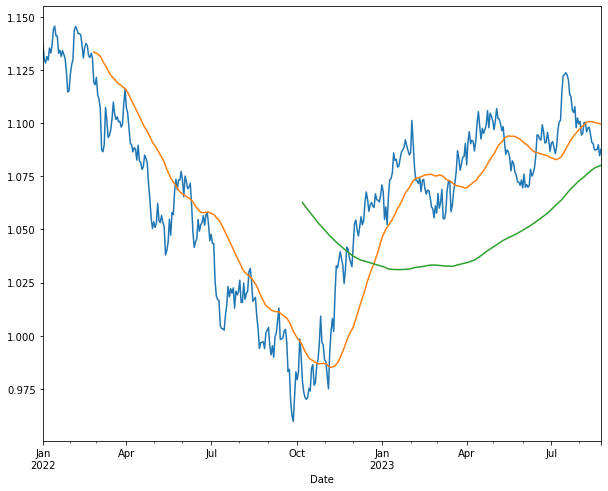

In [10]:
plt.figure(figsize=(10, 8))

data_1['Close'].plot(label='Close')
data_1['MAE40'].plot(label='MAE40')
data_1['MAE200'].plot(label='MAE200')

In [11]:
data_1['MAE10'] = data_1['Close'].rolling(10).mean()
data_1['MAE50'] = data_1['Close'].rolling(50).mean()

<AxesSubplot:xlabel='Date'>

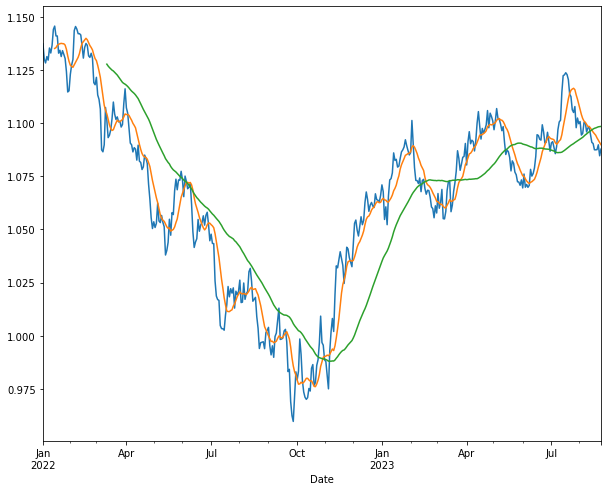

In [12]:
plt.figure(figsize=(10, 8))

data_1['Close'].plot(label='Close')
data_1['MAE10'].plot(label='MAE10')
data_1['MAE50'].plot(label='MAE50')

In [13]:
data_1['SHARES'] = [1 if data_1.loc[i,'MAE10']>data_1.loc[i,'MAE50'] else 0 for i in data_1.index]

In [14]:
data_1['PROFIT'] = [data_1.loc[i,'CLOSE1'] - data_1.loc[i,'Close'] if data_1.loc[i,'SHARES'] ==1 else 0 for i in data_1.index]

<AxesSubplot:xlabel='Date'>

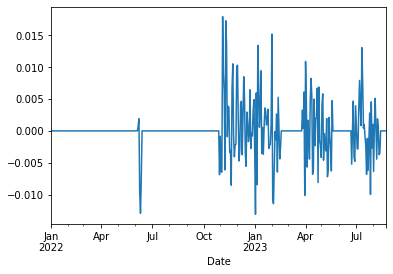

In [15]:
data_1['PROFIT'].plot()

In [16]:
data_1['WEALTH'] = data_1['PROFIT'].cumsum()
data_1.tail()

,Open,High,Low,Close,Adj Close,Volume,CLOSE1,PRICE_DIFF,DAILY_RETURN,DIRECTION,MAE40,MAE200,MAE10,MAE50,SHARES,PROFIT,WEALTH
Date,,,,,,,,,,,,,,,,,
2023-08-18,1.087465,1.089562,1.084646,1.087465,1.087465,0,1.087559,0.000095,0.000087,1,1.100147,1.079168,1.094320,1.097779,0,0.0,0.040114
2023-08-21,1.087559,1.091358,1.087063,1.087559,1.087559,0,1.089835,0.002276,0.002092,1,1.100070,1.079441,1.093050,1.098028,0,0.0,0.040114
2023-08-22,1.089835,1.093200,1.083400,1.089835,1.089835,0,1.084669,-0.005166,-0.004740,0,1.100039,1.079731,1.092002,1.098299,0,0.0,0.040114
2023-08-23,1.084669,1.087051,1.080299,1.084669,1.084669,0,1.087784,0.003115,0.002872,1,1.099763,1.079975,1.090879,1.098414,0,0.0,0.040114
2023-08-24,1.086720,1.087784,1.086248,1.087784,1.087784,0,NaN,NaN,NaN,0,1.099668,1.080217,1.089881,1.098483,0,0.0,0.040114


In [17]:
print("Total money you win is: ", data_1.loc[data_1.index[-2],'WEALTH'])

Total money you win is:  0.04011410474777222


In [18]:
print("Total money you spent is: ", data_1.loc[data_1.index[-2],'Close'])

Total money you spent is:  1.0846692323684692


In [19]:
data_1['LOG_RETURN'] = np.log(data_1['CLOSE1']) - np.log(data_1['Close'])

In [20]:
mu = data_1['LOG_RETURN'].mean()
sigma = data_1['LOG_RETURN'].std(ddof=1)

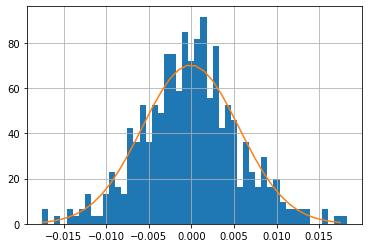

In [22]:
from scipy.stats import norm
data_1['LOG_RETURN'].hist(bins=50,density=True)
list_range = np.arange(min(data_1['LOG_RETURN']),max(data_1['LOG_RETURN']), 0.001)
plt.plot(list_range, norm.pdf(list_range,mu,sigma))

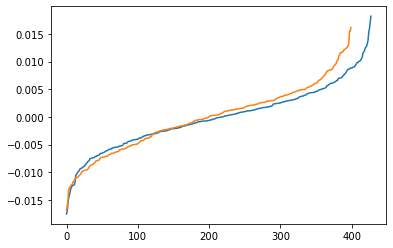

In [23]:
plt.plot(np.sort(data_1['LOG_RETURN']))
plt.plot(np.sort(norm.rvs(loc=mu,scale=sigma,size=400)))

In [28]:
def denplotnorm(lst_var:list, cloud_size=100):
    mu = np.mean(lst_var)
    sigma = np.std(lst_var,ddof=0)
    sam_size = len(lst_var)
    plt.figure(figsize=(15, 10))
    for i in range(cloud_size):
        plt.plot(np.sort(norm.rvs(loc=mu,scale=sigma,size=sam_size)),'g')
    plt.plot(np.sort(lst_var),'r')

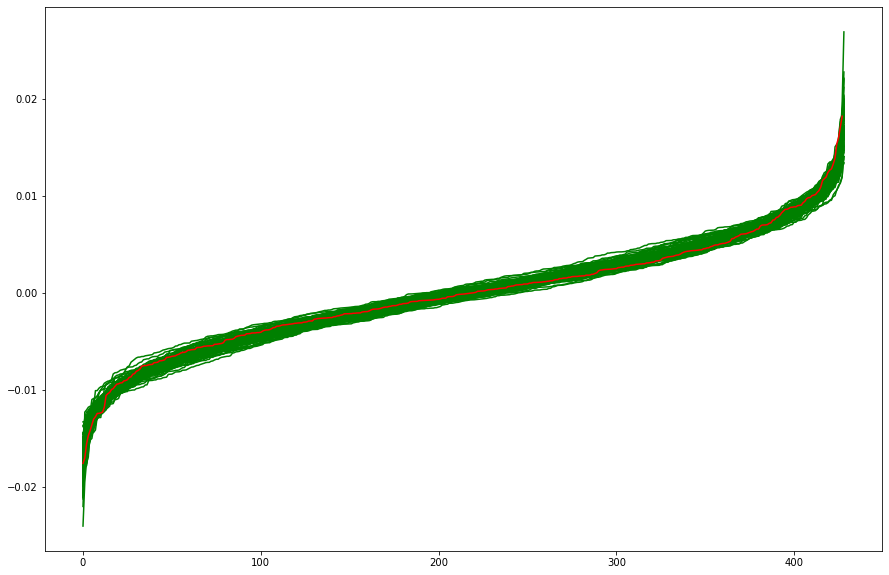

In [29]:
denplotnorm(data_1['LOG_RETURN'])

In [79]:
list(range(9))

TypeError: 'numpy.ndarray' object is not callable

In [85]:
print(type(range(3)))

TypeError: 'numpy.ndarray' object is not callable

In [12]:
ticker = 'AAPL'
start_date = '2022-01-06'
end_date = '2023-04-07'
interv_ticker = interval = "30m"

data_2 = yf.download(ticker, start_date, end_date,interv_ticker)
print(data_2)

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-06  172.699997  175.300003  171.639999  172.000000  170.746811   
2022-01-07  172.889999  174.139999  171.029999  172.169998  170.915573   
2022-01-10  169.080002  172.500000  168.169998  172.190002  170.935425   
2022-01-11  172.320007  175.179993  170.820007  175.080002  173.804382   
2022-01-12  176.119995  177.179993  174.820007  175.529999  174.251068   
...                ...         ...         ...         ...         ...   
2023-03-31  162.440002  165.000000  161.910004  164.899994  164.899994   
2023-04-03  164.270004  166.289993  164.220001  166.169998  166.169998   
2023-04-04  166.600006  166.839996  165.110001  165.630005  165.630005   
2023-04-05  164.740005  165.050003  161.800003  163.759995  163.759995   
2023-04-06  162.429993  164.960007  162.000

In [15]:
import DarwinexDownloader

In [14]:
import getpass